<a href="https://colab.research.google.com/github/vilcagamarracf/Python_Snippets/blob/main/Snippets/Snippets_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2> Pandas Snippets - Colaboratory 👨‍🚀</h2></center>

<center>
<img src='https://www.freecodecamp.org/news/content/images/size/w2000/2020/07/pandas-logo.png' alt='Pandas logo' width='400'/>
</center>

**Referencias**
 
- [Página Oficial de Pandas](https://pandas.pydata.org/)
- [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Dataquest Pandas Cheat Sheet](https://drive.google.com/file/d/1UHK8wtWbADvHKXFC937IS6MTnlSZC_zB/view)


Antes de empezar deberemos usar archivos de nuestro drive

In [ ]:
# @markdown Cargar drive personal

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install --upgrade seaborn
!pip install --upgrade pandas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
pd.__version__

'1.3.3'

In [ ]:
sns.__version__

'0.11.2'

### Referencias

- [How to Filter Data in Python Pandas Dataframes using Conditional Statements](https://medium.com/@AIWatson/how-to-filter-data-in-python-pandas-dataframes-using-conditional-statements-69c4bb842de8)
- [How to select data from a Python Pandas DataFrame using loc and iloc in Jupyter Lab](https://medium.com/@AIWatson/select-data-from-a-pandas-dataframe-using-loc-and-iloc-in-jupyter-lab-b1c05c8248dd)

### Importar base de datos

- `pd.read_csv()`
- `pd.DataFrame()`

Usaremos datos de precipitación en formato `.csv` alojado en nuestro drive.

> Nota: Si el archivo .csv pesa demasiado (> 500mb), procurar no abrirlo directamente ya que tomaría mucho tiempo en hacerlo. Es mejor usar python o R para revisarlo. Si se abre excel, éste no cargaría y daría un error tipo Permission Denied en python si se tratara de abrir con este.

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Otros/pp_salida2.csv')
df.head()

### Información general del dataframe

- `df.info()`
- `df.shape`
- `df.columns`
- `df.dtypes`
- `df.values`

Uso de paréntesis:

- **SI**, para extracción de datos del dataframe
- **NO**, para extracción de información de atributos del dataframe

In [ ]:
df.info()

In [ ]:
print(pp.shape)
print(f'Numero de columnas: {pp.shape[1]}\nNumero de filas: {pp.shape[0]}')

In [ ]:
pp.columns

In [ ]:
pp.dtypes

In [ ]:
pp.values # array

### Modificando el dataframe

In [ ]:
# Usar un nuevo dataframe a partir de uno
pp = df.iloc[:,:5]
pp.head(3)

In [ ]:
pp['P1'].head() # obtener información de columnas

In [ ]:
pp[0:10] # obtener información de filas

In [ ]:
pp[pp['P1']<5].head()

In [ ]:
df[df['DATE']=='01/03/1982']

### Modificación de fechas

Información mensual: `01/01/1981`

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Otros/pp_salida2.csv').iloc[:,:5]
df.head(3)

Al hacer el cambio de tipo object a datetime se produce un cambio: el formato `%d/%m/%Y` cambió a `%Y/%d/%m`. Se debe a que Python trabaja las fechas en formato inglés.

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Otros/pp_salida2.csv').iloc[:,:5]
df.DATE = pd.to_datetime(df.DATE, format='%d/%m/%Y')
# df.DATE = df.DATE.dt.strftime('%d/%m/%Y') 
# df.DATE = pd.to_datetime(df.DATE)
df.head(13)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.DATE, df.P1, 'r-o')
plt.show()

In [ ]:
type(df.DATE[0])

- Antes: `01/01/1981`
- Después: `1981-01-01	`

Finalmente:

In [ ]:
# from datetime import datetime as dt
df['DATE'] = df['DATE'].dt.strftime('%d/%m/%Y') 
df.head(100)

El formato `'%m/%d/%Y'` no es el que representa realmente nuestro sistema de fechas pero nos sirve.

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Otros/pp_salida2.csv').iloc[:,:5]
# df.head(13)
df['DATE'] = pd.to_datetime(df['DATE'], format='%d/%Y/%m', errors='ignore')
df.head(13)

In [ ]:
# Function to add date variables to DataFrame.
def add_date_info(df):
  df['Timestamp'] = pd.to_datetime(df['millis'], unit='ms')
  df['Year'] = pd.DatetimeIndex(df['Timestamp']).year
  df['Month'] = pd.DatetimeIndex(df['Timestamp']).month
  df['Day'] = pd.DatetimeIndex(df['Timestamp']).day
  df['DOY'] = pd.DatetimeIndex(df['Timestamp']).dayofyear
  return df

**Cambiando formato de fechas**

In [ ]:
# Transformar columna de tipo string a tipo datetime64
pp.DATE = pd.to_datetime(pp.DATE, format='%d/%m/%Y')
# Ubicar como index para posterior visualización con matplotlib
pp.set_index('DATE', inplace=True)
pp.head()

In [ ]:
pp.dtypes

## Revisión de curso de linkedin

### Gestión de datos en Python

#### Introducción a pandas

In [ ]:
path = r'/content/drive/MyDrive/Colab Notebooks/Snippets/bdatos/base_datos_2008_short.csv'

import pandas as pd
df = pd.read_csv(path) # nrows = 100
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6193029,2008,11,28,5,1607.0,1610,5.0,10,US,882,N933UW,298.0,300.0,274.0,-5.0,-3.0,LAS,BOS,2381,6.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2566613,2008,5,7,3,1956.0,1946,2054.0,2049,OO,5455,N576SW,58.0,63.0,47.0,5.0,10.0,SBP,SFO,191,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,873200,2008,2,21,4,921.0,930,1122.0,1141,US,1800,N747UW,121.0,131.0,101.0,-19.0,-9.0,CLT,BOS,728,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1510383,2008,3,28,5,1444.0,1429,1711.0,1638,EV,4446,N718EV,147.0,129.0,103.0,33.0,15.0,ATL,ALB,852,2.0,42.0,0,NaN,0,15.0,0.0,18.0,0.0,0.0
4,1164410,2008,2,6,3,556.0,600,1137.0,1128,DL,476,N615DL,221.0,208.0,201.0,9.0,-4.0,PHX,ATL,1587,7.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(10000, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   Year               10000 non-null  int64  
 2   Month              10000 non-null  int64  
 3   DayofMonth         10000 non-null  int64  
 4   DayOfWeek          10000 non-null  int64  
 5   DepTime            9813 non-null   float64
 6   CRSDepTime         10000 non-null  int64  
 7   ArrTime            9791 non-null   float64
 8   CRSArrTime         10000 non-null  int64  
 9   UniqueCarrier      10000 non-null  object 
 10  FlightNum          10000 non-null  int64  
 11  TailNum            9888 non-null   object 
 12  ActualElapsedTime  9786 non-null   float64
 13  CRSElapsedTime     9999 non-null   float64
 14  AirTime            9786 non-null   float64
 15  ArrDelay           9786 non-null   float64
 16  DepDelay           9813

In [ ]:
df.sample(frac= 1) # Mostrar el dataframe desordenado

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3444,6652956,2008,12,12,5,1639.0,1642,1807.0,1806,OO,6491,N969SW,88.0,84.0,60.0,1.0,-3.0,LAX,SMF,373,4.0,24.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5869,914839,2008,2,3,7,1122.0,1122,1249.0,1300,EV,4337,N870AS,87.0,98.0,67.0,-11.0,0.0,OAJ,ATL,399,13.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
598,6394402,2008,11,13,4,827.0,830,1012.0,1020,AA,2003,N5DVAA,165.0,170.0,137.0,-8.0,-3.0,BOS,ORD,867,12.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6492,6009546,2008,11,24,1,755.0,800,1016.0,1040,WN,3576,N913WN,141.0,160.0,131.0,-24.0,-5.0,DTW,MCO,957,5.0,5.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9140,3701459,2008,7,31,4,1939.0,1625,2042.0,1725,WN,87,N413WN,63.0,60.0,42.0,197.0,194.0,TPA,FLL,197,11.0,10.0,0,NaN,0,0.0,38.0,3.0,0.0,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7406,2822901,2008,5,16,5,1207.0,1215,1732.0,1732,NW,590,N556NW,205.0,197.0,180.0,0.0,-8.0,PDX,MSP,1426,5.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2391,4957555,2008,9,18,4,858.0,905,1131.0,1138,XE,2246,N17115,153.0,153.0,121.0,-7.0,-7.0,IAH,ORD,925,11.0,21.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1367,5161808,2008,9,2,2,1010.0,1015,1528.0,1545,FL,349,N176AT,198.0,210.0,176.0,-17.0,-5.0,LAS,MKE,1524,10.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4381,6645829,2008,12,1,1,825.0,816,1109.0,1014,OO,6017,N934SW,164.0,118.0,83.0,55.0,9.0,ORD,ICT,588,6.0,75.0,0,NaN,0,0.0,2.0,46.0,0.0,7.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [ ]:
df.DepTime

0       1607.0
1       1956.0
2        921.0
3       1444.0
4        556.0
         ...  
9995    2249.0
9996    1127.0
9997    1103.0
9998    1709.0
9999     810.0
Name: DepTime, Length: 10000, dtype: float64

In [ ]:
df.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [ ]:
df.values # para operaciones matriciales y así

array([[6193029, 2008, 11, ..., nan, nan, nan],
       [2566613, 2008, 5, ..., nan, nan, nan],
       [873200, 2008, 2, ..., nan, nan, nan],
       ...,
       [497153, 2008, 1, ..., 21.0, 0.0, 0.0],
       [2017490, 2008, 4, ..., nan, nan, nan],
       [897650, 2008, 2, ..., nan, nan, nan]], dtype=object)

In [ ]:
df2 = df.head(10)
df2

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6193029,2008,11,28,5,1607.0,1610,5.0,10,US,882,N933UW,298.0,300.0,274.0,-5.0,-3.0,LAS,BOS,2381,6.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2566613,2008,5,7,3,1956.0,1946,2054.0,2049,OO,5455,N576SW,58.0,63.0,47.0,5.0,10.0,SBP,SFO,191,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,873200,2008,2,21,4,921.0,930,1122.0,1141,US,1800,N747UW,121.0,131.0,101.0,-19.0,-9.0,CLT,BOS,728,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1510383,2008,3,28,5,1444.0,1429,1711.0,1638,EV,4446,N718EV,147.0,129.0,103.0,33.0,15.0,ATL,ALB,852,2.0,42.0,0,NaN,0,15.0,0.0,18.0,0.0,0.0
4,1164410,2008,2,6,3,556.0,600,1137.0,1128,DL,476,N615DL,221.0,208.0,201.0,9.0,-4.0,PHX,ATL,1587,7.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,666858,2008,2,21,4,852.0,850,943.0,950,WN,2614,N316SW,111.0,120.0,98.0,-7.0,2.0,MCO,BNA,616,6.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,3626868,2008,7,9,3,1824.0,1825,1919.0,1925,WN,1134,N741SA,55.0,60.0,45.0,-6.0,-1.0,SAT,DAL,248,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,6780985,2008,12,8,1,2145.0,2144,2231.0,2246,EV,5126,N857AS,46.0,62.0,29.0,-15.0,1.0,ATL,AVL,164,2.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,1354034,2008,3,5,3,1910.0,1915,2217.0,2229,OO,6714,N916SW,127.0,134.0,105.0,-12.0,-5.0,DEN,MEM,872,4.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,4985402,2008,9,14,7,1230.0,1230,NaN,1427,OH,6480,N916CA,NaN,117.0,NaN,NaN,0.0,JAX,CVG,614,NaN,9.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN


#### Filtrar datos en python

- [How to Filter Data in Python Pandas Dataframes using Conditional Statements](https://medium.com/@AIWatson/how-to-filter-data-in-python-pandas-dataframes-using-conditional-statements-69c4bb842de8)

In [ ]:
df.ArrDelay.head()

0    -5.0
1     5.0
2   -19.0
3    33.0
4     9.0
Name: ArrDelay, dtype: float64

In [ ]:
df[50:55]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
50,896281,2008,2,19,2,917.0,919,1053.0,1106,DL,1461,N624DL,96.0,107.0,73.0,-13.0,-2.0,ATL,RSW,515,5.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
51,3499203,2008,6,13,5,2255.0,2300,2337.0,2350,AA,1274,N4XPAA,42.0,50.0,31.0,-13.0,-5.0,DFW,AUS,190,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
52,6596444,2008,12,25,4,1005.0,1002,1105.0,1058,YV,7184,N17175,60.0,56.0,31.0,7.0,3.0,ORD,ATW,160,5.0,24.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
53,5394014,2008,10,6,1,1731.0,1730,1837.0,1835,WN,45,N327SW,66.0,65.0,45.0,2.0,1.0,DAL,HOU,239,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
54,6656822,2008,12,8,1,1844.0,1852,2032.0,2002,OO,6667,N928SW,168.0,130.0,119.0,30.0,-8.0,CID,DEN,692,8.0,41.0,0,NaN,0,0.0,0.0,30.0,0.0,0.0


**Filtrado con condicionales**

In [ ]:
# Usando una condición
df[df.ArrDelay > 60].head(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
21,637157,2008,2,12,2,2347.0,2105,100.0,2235,WN,2633,N645SW,73.0,90.0,61.0,145.0,162.0,MCI,DAL,461,6.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,145.0
25,3779741,2008,7,6,7,1350.0,1225,1645.0,1532,OH,5681,N695CA,175.0,187.0,135.0,73.0,85.0,MIA,JFK,1090,10.0,30.0,0,NaN,0,0.0,73.0,0.0,0.0,0.0


In [ ]:
# Usando una condición
df[df.ArrDelay != 60].head(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6193029,2008,11,28,5,1607.0,1610,5.0,10,US,882,N933UW,298.0,300.0,274.0,-5.0,-3.0,LAS,BOS,2381,6.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2566613,2008,5,7,3,1956.0,1946,2054.0,2049,OO,5455,N576SW,58.0,63.0,47.0,5.0,10.0,SBP,SFO,191,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.Origin.unique()

array(['LAS', 'SBP', 'CLT', 'ATL', 'PHX', 'MCO', 'SAT', 'DEN', 'JAX',
       'DSM', 'DFW', 'LGA', 'ONT', 'CVG', 'PDX', 'IAH', 'BOS', 'FNT',
       'MCI', 'CLE', 'SAN', 'MIA', 'ORF', 'OAK', 'HOU', 'MDW', 'GUC',
       'DCA', 'ORD', 'FLL', 'SLC', 'EWR', 'JFK', 'IND', 'PFN', 'DAL',
       'CID', 'MKE', 'TYS', 'BUR', 'BWI', 'TPA', 'EUG', 'DTW', 'OMA',
       'SYR', 'PIT', 'SPI', 'XNA', 'IAD', 'SAV', 'STL', 'BTV', 'SFO',
       'SEA', 'PHL', 'LNK', 'LAX', 'BGR', 'MSP', 'OGG', 'HNL', 'SMF',
       'GRR', 'RDU', 'ITO', 'ABQ', 'RNO', 'PBI', 'OKC', 'SHV', 'MEM',
       'RSW', 'BUF', 'BDL', 'TUS', 'PVD', 'ELP', 'CMH', 'COS', 'MSN',
       'JAN', 'MAF', 'LIT', 'MLU', 'SJU', 'BNA', 'MFR', 'MSY', 'MRY',
       'GRB', 'CSG', 'RDM', 'RIC', 'CAK', 'LMT', 'MHT', 'HRL', 'FAI',
       'TUL', 'ATW', 'JAC', 'PSG', 'HHH', 'KOA', 'SJC', 'HSV', 'MYR',
       'GJT', 'SBA', 'DRO', 'FWA', 'SWF', 'IDA', 'GRK', 'STT', 'CMI',
       'BHM', 'COD', 'ACV', 'ANC', 'ROC', 'AMA', 'FAT', 'TYR', 'PNS',
       'BRO', 'GEG',

In [ ]:
df[df.Origin == 'ISP'].head(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
664,5986935,2008,11,17,1,1105.0,1110,1404.0,1410,WN,3083,N478WN,179.0,180.0,165.0,-6.0,-5.0,ISP,TPA,1034,6.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
983,3043866,2008,6,17,2,NaN,935,NaN,1210,WN,1236,NaN,NaN,155.0,NaN,NaN,NaN,ISP,MCO,972,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Usando dos condiciones
df[(df.Origin == 'ISP') & (df.ArrDelay > 60)].head(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [ ]:
df[(df.Origin == 'ISP') | (df.ArrDelay > 60)].head(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
21,637157,2008,2,12,2,2347.0,2105,100.0,2235,WN,2633,N645SW,73.0,90.0,61.0,145.0,162.0,MCI,DAL,461,6.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,145.0
25,3779741,2008,7,6,7,1350.0,1225,1645.0,1532,OH,5681,N695CA,175.0,187.0,135.0,73.0,85.0,MIA,JFK,1090,10.0,30.0,0,NaN,0,0.0,73.0,0.0,0.0,0.0


In [ ]:
# Filtrar los valores ISP e IND de Origin
df[df.Origin.isin(['ISP', 'IND'])].head(20)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
47,497339,2008,1,26,6,1754.0,1800,1813.0,1815,AA,1058,N556AA,79.0,75.0,46.0,-2.0,-6.0,IND,ORD,177,21.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
529,6999009,2008,12,4,4,1051.0,1058,1234.0,1229,DL,1719,N940DL,103.0,91.0,79.0,5.0,-7.0,IND,ATL,432,4.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
630,1627993,2008,3,2,7,1722.0,1725,1748.0,1750,NW,1295,N368NB,86.0,85.0,60.0,-2.0,-3.0,IND,MEM,381,15.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
664,5986935,2008,11,17,1,1105.0,1110,1404.0,1410,WN,3083,N478WN,179.0,180.0,165.0,-6.0,-5.0,ISP,TPA,1034,6.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
699,953520,2008,2,22,5,1717.0,1607,1842.0,1717,FL,719,N240AT,265.0,250.0,221.0,85.0,70.0,IND,LAS,1591,11.0,33.0,0,NaN,0,0.0,0.0,15.0,0.0,70.0
707,3102789,2008,6,28,6,626.0,634,818.0,829,XE,2251,N15910,112.0,115.0,93.0,-11.0,-8.0,IND,EWR,644,8.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
936,3172444,2008,6,5,4,1658.0,1549,1701.0,1558,OO,6141,N774SK,63.0,69.0,38.0,63.0,69.0,IND,ORD,177,6.0,19.0,0,NaN,0,0.0,0.0,63.0,0.0,0.0
983,3043866,2008,6,17,2,NaN,935,NaN,1210,WN,1236,NaN,NaN,155.0,NaN,NaN,NaN,ISP,MCO,972,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
1116,5437028,2008,10,19,7,926.0,925,1215.0,1230,WN,1928,N926WN,169.0,185.0,158.0,-15.0,1.0,ISP,RSW,1101,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1219,1547963,2008,3,20,4,920.0,925,1140.0,1149,FL,390,N289AT,140.0,144.0,126.0,-9.0,-5.0,IND,RSW,946,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**Valores faltantes: NaN**

In [ ]:
df[pd.isna(df.SecurityDelay)].head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6193029,2008,11,28,5,1607.0,1610,5.0,10,US,882,N933UW,298.0,300.0,274.0,-5.0,-3.0,LAS,BOS,2381,6.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2566613,2008,5,7,3,1956.0,1946,2054.0,2049,OO,5455,N576SW,58.0,63.0,47.0,5.0,10.0,SBP,SFO,191,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,873200,2008,2,21,4,921.0,930,1122.0,1141,US,1800,N747UW,121.0,131.0,101.0,-19.0,-9.0,CLT,BOS,728,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1164410,2008,2,6,3,556.0,600,1137.0,1128,DL,476,N615DL,221.0,208.0,201.0,9.0,-4.0,PHX,ATL,1587,7.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,666858,2008,2,21,4,852.0,850,943.0,950,WN,2614,N316SW,111.0,120.0,98.0,-7.0,2.0,MCO,BNA,616,6.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df[pd.isna(df.SecurityDelay)].head())

5

#### Transformaciones de la base de datos

**Creando una columna nueva**

In [ ]:
df['HoursDelay'] = round(df.ArrDelay/60)
df['HoursDelay'].head()

0   -0.0
1    0.0
2   -0.0
3    1.0
4    0.0
Name: HoursDelay, dtype: float64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'HoursDelay'],
      dtype='object')

**Eliminando filas**

In [ ]:
# Eliminar una columna
del(df['Unnamed: 0'])
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'HoursDelay'],
      dtype='object')

In [ ]:
# Eliminar columnas en el mismo dataframe
df.drop(['Distance', 'AirTime', 'TaxiOut'], axis=1, inplace=True)

In [ ]:
# Eliminar más columnas y creando otra variable
df_del = df.drop(['Distance', 'AirTime', 'TaxiOut'], axis= 1)
df_del.columns

In [ ]:
# Eliminar filas
# df.drop(range(0,1000000), inplace=True)

**Añadir nuevas filas**

In [ ]:
df.Origin.unique()

In [ ]:
df[df.Origin == 'IAD']

In [ ]:
dfIAD = df[df.Origin == 'IAD']
dfIND = df[df.Origin == 'IND']

In [ ]:
newdf = dfIAD.append(dfIND)
newdf.Origin

#### Groupby: obtener información esencial

Agrupando por categorías

In [ ]:
df.groupby(by='DayOfWeek')['ArrDelay'].max()

DayOfWeek
1    304.0
2    517.0
3    243.0
4    368.0
5    654.0
6    597.0
7    318.0
Name: ArrDelay, dtype: float64

In [ ]:
df.groupby(by='DayOfWeek')['ArrDelay'].mean()

DayOfWeek
1     8.691156
2     6.158184
3     5.382479
4     7.817680
5    11.070866
6     6.705065
7    11.259179
Name: ArrDelay, dtype: float64

In [ ]:
df.groupby(by='DayOfWeek')['ArrDelay'].count()

DayOfWeek
1    1470
2    1454
3    1404
4    1448
5    1397
6    1224
7    1389
Name: ArrDelay, dtype: int64

In [ ]:
df.groupby(by='DayOfWeek')['ArrDelay'].describe()

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,,,,,,,,
1,1470.0,8.691156,36.977573,-34.0,-10.0,-2.0,12.00,304.0
2,1454.0,6.158184,37.456023,-48.0,-11.0,-3.0,9.75,517.0
3,1404.0,5.382479,30.537634,-42.0,-10.0,-2.0,10.00,243.0
4,1448.0,7.817680,34.297631,-52.0,-10.0,-1.0,13.00,368.0
5,1397.0,11.070866,41.331908,-46.0,-9.0,0.0,17.00,654.0
6,1224.0,6.705065,41.192551,-44.0,-11.0,-3.0,10.00,597.0
7,1389.0,11.259179,41.607147,-50.0,-10.0,-1.0,15.00,318.0


In [ ]:
df.groupby(by='DayOfWeek')['ArrDelay', 'DepDelay'].mean() # Se espera que sean del mismo tipo de dato

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ArrDelay,DepDelay
DayOfWeek,,
1,8.691156,10.767821
2,6.158184,8.131597
3,5.382479,7.098862
4,7.817680,9.589249
5,11.070866,11.850427
6,6.705065,9.224307
7,11.259179,13.393831


In [ ]:
# Rango de valores 
df.groupby(by='DayOfWeek')['ArrDelay'].max() - df.groupby(by='DayOfWeek')['ArrDelay'].min()

DayOfWeek
1    338.0
2    565.0
3    285.0
4    420.0
5    700.0
6    641.0
7    368.0
Name: ArrDelay, dtype: float64

In [ ]:
dfIADIND = df[df.Origin.isin(['IAD','IND'])]

In [ ]:
dfIADIND.groupby(by=['DayOfWeek','Origin'])['ArrDelay'].mean()

DayOfWeek  Origin
1          IAD       32.500000
           IND       -1.500000
2          IAD       -2.500000
           IND        0.250000
3          IAD      -11.750000
           IND       -6.000000
4          IAD       16.437500
           IND        3.187500
5          IAD       20.928571
           IND       18.272727
6          IAD       17.333333
           IND      -13.750000
7          IAD        8.764706
           IND        1.181818
Name: ArrDelay, dtype: float64

El orden con el que se ponen las columnas en el by afectará el resultado final.

In [ ]:
mygroupby = dfIADIND.groupby(by=['DayOfWeek','Origin'])['ArrDelay']

In [ ]:
mygroupby.max()

DayOfWeek  Origin
1          IAD       266.0
           IND        39.0
2          IAD        50.0
           IND        14.0
3          IAD         8.0
           IND        15.0
4          IAD       111.0
           IND        63.0
5          IAD       103.0
           IND       186.0
6          IAD       149.0
           IND         6.0
7          IAD        73.0
           IND        89.0
Name: ArrDelay, dtype: float64

In [ ]:
mygroupby.min()

DayOfWeek  Origin
1          IAD      -26.0
           IND      -12.0
2          IAD      -29.0
           IND      -24.0
3          IAD      -37.0
           IND      -17.0
4          IAD      -36.0
           IND      -15.0
5          IAD      -34.0
           IND      -15.0
6          IAD      -25.0
           IND      -33.0
7          IAD      -14.0
           IND      -21.0
Name: ArrDelay, dtype: float64

#### Tratar datos duplicados y perdidos

In [ ]:
dfduplicado = df.append(df)

In [ ]:
dfduplicado = dfduplicado.sample(frac=1)
dfclean = dfduplicado.drop_duplicates()

In [ ]:
len(dfclean) == len(df)

In [ ]:
dfclean.drop_duplicates(subset='DayofMonth')

In [ ]:
# Datos faltantes
df.dropna()

Ninguna de nuestras filas tiene un valor faltante

In [ ]:
df.dropna(thresh=25) # 25 entradas llenas de las 29 que hay

In [ ]:
df.dropna(thresh=len(df.columns)-2)

In [ ]:
df.dropna(subset= ['CancellationCode']) # Devolverá un dataframe donde no tenga NaN en dicha columna

#### Numpy

In [ ]:
import numpy as np

valoraciones = np.array([[8,7,8,5],[2,6,8,1],[8,8,9,5]])
valoraciones

In [ ]:
valoraciones[0][1]

In [ ]:
valoraciones[0,1]

In [ ]:
valoraciones2 = np.array([[[8,7,8,5],[2,6,8,1]],
                          [[8,7,8,5],[2,6,8,1]],
                          [[8,7,8,5],[2,6,8,1]]])
valoraciones2

Puede entenderse como 3 clientes con distintos datos, 4 productos con una valoración para cada producto.

In [ ]:
valoraciones2[0,1,2]

In [ ]:
np.zeros((3,2))

In [ ]:
valoraciones2 + np.ones((3,2,4))

In [ ]:
valoraciones2

In [ ]:
np.mean(valoraciones2)

In [ ]:
for i in range(0,3):
  print(f'Eje {i}:\n', np.mean(valoraciones2, axis=i),'\n')

In [ ]:
lista = [i for i in range(1,13)]
np.reshape(lista, (3,2,2))

In [ ]:
# Numpy con dataframes
np.median(df['DepTime'])

In [ ]:
np.random.rand(2,2)

### Gestión de datos avanzada

#### Correlaciones, Entender las relaciones entre variables

In [ ]:
# import pandas as pd
import numpy as np

$$
\rho_{X,Y} = \frac{\sigma_{XY}}{\sigma_{X}\sigma_{Y}} = \frac{E[(X - \mu_X)(Y - \mu_Y)]}{\sigma_{X}\sigma_{Y}}
$$

In [ ]:
np.corrcoef(df.ArrDelay, df.DepDelay)

In [ ]:
df.dropna(inplace=True, subset=['ArrDelay','DepDelay'])

In [ ]:
np.corrcoef([df['ArrDelay'], df['DepDelay'], df['DepTime']])

In [ ]:
df.drop(columns= ['Unnamed: 0', 'Month', 'Year', 'Cancelled', 'Diverted'], inplace=True)

In [ ]:
df.corr()

In [ ]:
corr = round(df.corr(),3)
corr.style.background_gradient() # Se ve mejor para jupyter notebook

#### Test de la Chi-Cuadrado

$$
X^2 = \sum^{k}_{i=1} \frac{(\text{observado}_i - \text{esperado}_i)^2}{\text{esperado}_i}
$$

In [ ]:
np.random.seed(0)
df = df[df['Origin'].isin(['ISP','IND'])]
df = df.sample(frac=1)
df

In [ ]:
df['BigDelay'] = df['ArrDelay'] > 30
observados = pd.crosstab(index=df['BigDelay'], columns=df['Origin'], margins=True)

In [ ]:
observados

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
test = chi2_contingency(observados)
test

In [ ]:
esperados = pd.DataFrame(test[3])
esperados

In [ ]:
esperados_rel = round(esperados.apply(lambda r: r/len(df)*100, axis=1),2)

In [ ]:
observados_rel = round(observados.apply(lambda r: r/len(df)*100, axis=1),2)

In [ ]:
observados_rel

In [ ]:
esperados_rel

In [ ]:
test[1]

**Resumen de Test de Hipótesis**
- Si el p-valor < 0.05, hay diferencias significativas: Hay relación entre variables
- Si el p-valor > 0.05, no hay diferencias significativas: No hay relación entre variables

#### Análisis de datos extremos

In [ ]:
x = df['ArrDelay'].dropna()

In [ ]:
Q1 = np.percentile(x,25)
Q3 = np.percentile(x,75)
rangointer = Q3 - Q1

In [ ]:
umbralinferior = Q1 - 1.5*rangointer
umbralsuperior = Q3 + 1.5*rangointer

In [ ]:
umbralinferior

In [ ]:
umbralsuperior

In [ ]:
np.mean(x > umbralsuperior)

In [ ]:
np.mean(x < umbralinferior)

In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
outliers = EllipticEnvelope(contamination= .01)

In [ ]:
var_list = ['DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay']

In [ ]:
x = np.array(df.loc[:, var_list].dropna())

In [ ]:
outliers.fit(x)

In [ ]:
pred = outliers.predict(x)

In [ ]:
pred

In [ ]:
elips_outliers = np.where(pred == -1)[0]

In [ ]:
elips_outliers

#### Principios de las bases de datos relacionales

In [ ]:
data = [
        (1, 'Joan', 'Gasull', 25, 1, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
        (1, 'Joan', 'Gasull', 25, 2, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
        (1, 'Joan', 'Gasull', 25, 2, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
        (2, 'Joan', 'Gasull', 33, 2, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
        (2, 'Joan', 'Gasull', 33, 1, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
        (3, 'Joan', 'Gasull', 40, 2, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
        (3, 'Joan', 'Gasull', 40, 1, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
        (3, 'Joan', 'Gasull', 25, 1, 'Libreta', 1.2, .4, 0.8, 3, '03-02-2018'),
]

labels = ['Comprador_id', 'Nombre', 'Apellido', 'Edad', 'Producto_id', 'Producto',
          'Precio', 'Coste', 'Margen', 'Cantidad','Fecha']

In [ ]:
df = pd.DataFrame.from_records(data, columns=labels)

In [ ]:
df

In [ ]:
compradores = df.drop_duplicates(subset= 'Comprador_id', keep='first')
compradores

In [ ]:
compradores = compradores[['Comprador_id', 'Nombre', 'Apellido', 'Edad']]
compradores

In [ ]:
productos = df.drop_duplicates(subset= 'Producto_id', keep='first')

In [ ]:
productos = productos[['Producto_id', 'Producto', 'Precio', 'Coste', 'Margen']]
productos

In [ ]:
compras = df[['Comprador_id', 'Producto_id', 'Fecha', 'Cantidad']]
compras

#### Joins. Trabajar con bases de datos relacionales

In [ ]:
consumidores = [
                ('A','Móvil'),
                ('B','Móvil'),
                ('A','Portátil'),
                ('A','Tablet'),
                ('B','Tablet'),
                ('C','Portátil'),
                ('D','Smartwatch'),
                ('E','Consola')
] 

con_labels = ['Consumidor', 'Producto']

con_df = pd.DataFrame.from_records(consumidores, columns= con_labels)

productores = [
               ('a','Móvil'),
               ('a','Smartwatch'),
               ('a','Tablet'),
               ('b','Portátil'),
               ('c','Sobremesa'),
               ('c','Portátil')
]

prod_labels = ['Productor', 'Producto']

prod_df = pd.DataFrame.from_records(productores, columns= prod_labels)

In [ ]:
con_df

In [ ]:
prod_df

In [ ]:
pd.merge(con_df, prod_df, on='Producto', how='outer')

In [ ]:
pd.merge(con_df, prod_df, on='Producto', how='inner') # No hay sobremesa ni consola

In [ ]:
pd.merge(con_df, prod_df, on='Producto', how='right')

In [ ]:
pd.merge(con_df, prod_df, on='Producto', how='left')

#### Paralelizar loops en Python

In [ ]:
from joblib import Parallel, delayed

In [ ]:
df.columns

In [ ]:
df_sub = df[['CarrierDelay', 'WeatherDelay', 'NASDelay','SecurityDelay','LateAircraftDelay']]
df_sub.head()

In [ ]:
def retraso_maximo(fila):
  if not np.isnan(fila).any():
    names = ['CarrierDelay', 'WeatherDelay', 'NASDelay','SecurityDelay','LateAircraftDelay']
    return names[fila.index(max(fila))]
  else:
    return 'None'

In [ ]:
results = []
for fila in df_sub.values.tolist():
  results.append(retraso_maximo(fila))

In [ ]:
results

In [ ]:
result = Parallel(n_jobs=2, backend= 'multiprocessing')(
    map(delayed(retraso_maximo),df_sub.values.tolist())
    )
result

### Visualización de datos en Matplotlib

#### Introducción al Matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = np.unique(df.Cancelled, return_counts=True)
data

(array([0, 1]), array([9811,  189]))

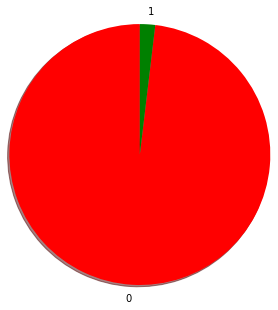

In [ ]:
plt.pie(x = data[1],
        labels = data[0],
        colors = ['Red','Green'],
        shadow = True,
        startangle = 90,
        radius = 1.5);

#### Modificar elementos del gráfico en Matplotlib

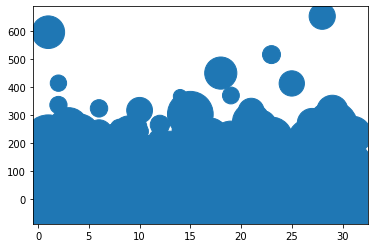

In [ ]:
plt.scatter(x=df.DayofMonth, y= df.ArrDelay, s= df.Distance);

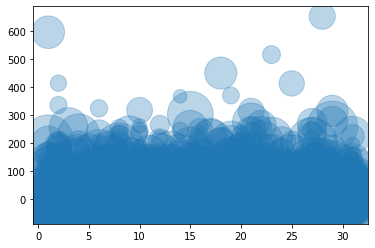

In [ ]:
plt.scatter(x=df.DayofMonth, y= df.ArrDelay, s= df.Distance, alpha=0.3);

In [ ]:
np.arange(1,8,1)

array([1, 2, 3, 4, 5, 6, 7])

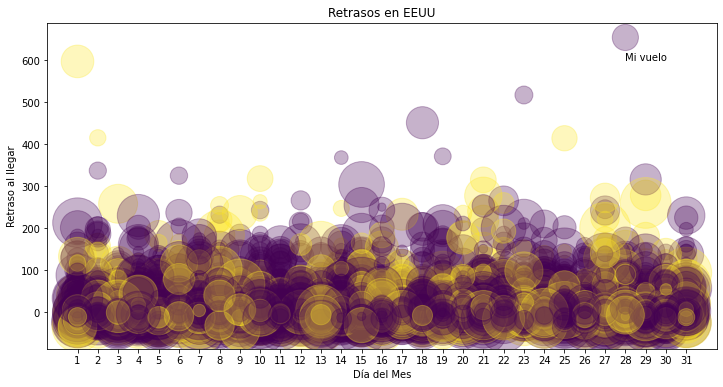

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df.DayofMonth, y= df.ArrDelay, s= df.Distance, alpha=0.3, c = df.DayOfWeek.isin([6,7])); # [6,7]
plt.title('Retrasos en EEUU')
plt.xlabel('Día del Mes')
plt.ylabel('Retraso al llegar')
# plt.ylim([0,150])
plt.xticks(list(np.arange(1,32,1))); # [0,15,30]
plt.text(x=28, y=600, s='Mi vuelo');

#### Etiquetas y leyendas en Matplotlib

In [ ]:
data = np.unique(df.DayOfWeek, return_counts=True)
labs = ['Lun','Mar','Mier','Jue','Vie','Sab','Dom']
data

(array([1, 2, 3, 4, 5, 6, 7]),
 array([1470, 1454, 1404, 1448, 1397, 1224, 1389]))

#### Gráficos para series temporales en Matplotlib

#### Histogramas y box plots en Matplotlib

#### Nubes de puntos y mapas de calor en Matplotlib


**Nubes de puntos**

In [ ]:
df.dropna(subset=['ArrDelay','DepDelay','Distance','AirTime'], inplace=True)

In [ ]:
sns.set(rc={'figure.figsize':(15,10)}) # Establecer el tamaño de las figuras de ahora en adelante

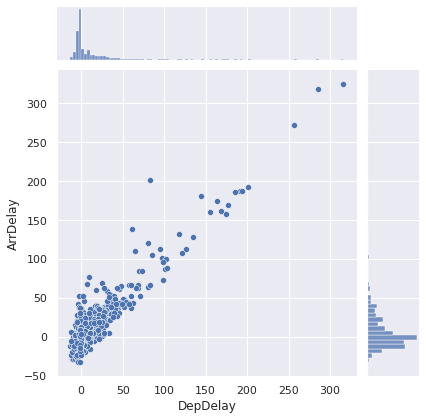

In [ ]:
df2 = df[df['Origin'].isin(['ATL', 'HOU', 'IND'])].sample(frac=1).head(1000)
sns.jointplot(data=df2, x='DepDelay', y='ArrDelay');

Se ha producido un scatterplot con histogramas para cada variable.

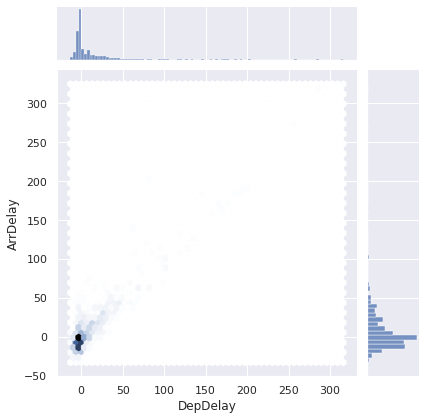

In [ ]:
sns.jointplot(data=df2, x='DepDelay', y='ArrDelay', kind='hex');

Para enfocarnos más en los datos, haremos un filtro

In [ ]:
df3 = df2[np.abs(df2['DepDelay'])<40]
df3 = df3[np.abs(df3['DepDelay'])<40]

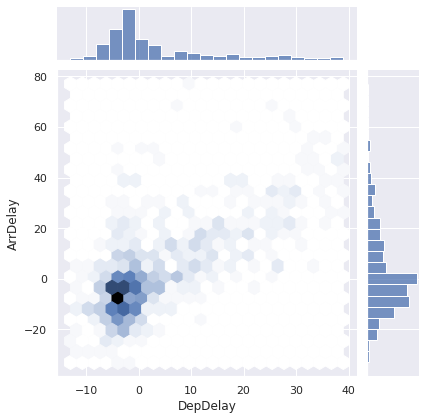

In [ ]:
sns.jointplot(data=df3, x='DepDelay', y='ArrDelay', kind='hex');

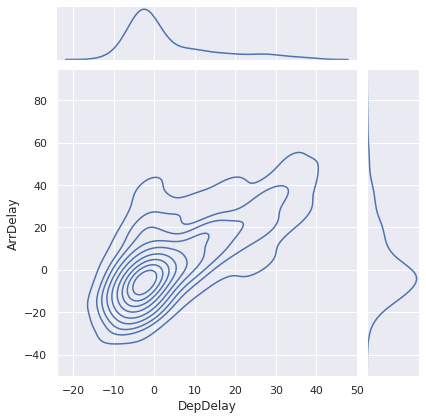

In [ ]:
sns.jointplot(data=df3, x='DepDelay', y='ArrDelay', kind='kde'); # Plot de densidad

**Mapas de calor**

In [ ]:
gb_df = pd.DataFrame(df2.groupby(['Origin','Month'], as_index=False,)['DepDelay'].mean())
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,11.808511
1,ATL,2,8.163265
2,ATL,3,15.590909
3,ATL,4,16.685714
4,ATL,5,5.655172


In [ ]:
data = gb_df.pivot('Month','Origin','DepDelay')
data

Origin,ATL,HOU,IND
Month,,,
1,11.808511,17.250000,-3.000000
2,8.163265,19.285714,23.000000
3,15.590909,47.500000,8.083333
4,16.685714,8.800000,-3.500000
5,5.655172,8.625000,16.375000
6,10.562500,11.166667,11.200000
7,13.142857,4.444444,6.333333
8,19.178571,25.400000,-6.857143
9,-0.800000,5.750000,-5.400000


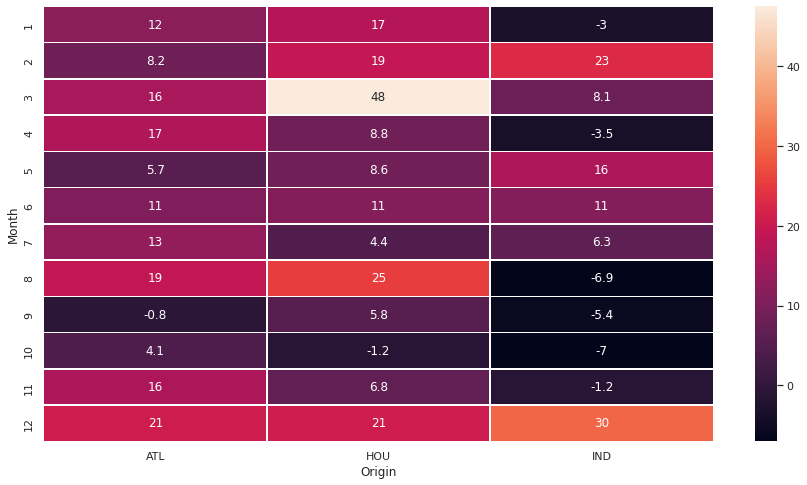

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data=data, annot=True, linewidths=0.5);